HOW THE MODEL WORKS.

    When you run the program it will ask you to insert some parameters:
    - The tag of the stock you want to analyse according to the yahoo finance tag.

    -The year from which you want to take the stock data. I suggest you not to take only rcent data or too old data. To make the
        model work in an efficiency way a year between 1990 and 2010 it will be ok. You can try different period of time to improve
        the efficiency of the model

    -How many days the model has to consider to make the prediction. Between 10 and 20 days it can be a good choice to give the model 
        a good amount of data in order not to make the program to slow.
        
    - How many days after today the model ha to predict the price. For example if you today is day x and you put 5 the model will predict
         the price at the date x+5. i suggest you not to predict too much in the future in order not to have a very low effciency of the model.
    
    In all of these parameters you can try different period of time to improve the efficiency of the model

    To make its predictions the model will study the price and the volume of the previous days.
    It will give you not just the prediction of the trend of the price (if the price will go up or down) but also the probability that its prediction is right.
    It will also give you some charts about the general trend of the price and the volume over the years.
        

In [726]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import pandas_ta as ta
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

tag=input("Digit asset tag ").upper()
year=input("Digit starting year ")
today=datetime.date.today()
db=yf.download(tag,start=f"{year}-01-01", end=today)
print(db.tail())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-14  306.739990  312.869995  305.029999  311.720001  311.720001   
2023-09-15  311.609985  312.000000  298.750000  300.309998  300.309998   
2023-09-18  298.190002  303.600006  297.799988  302.549988  302.549988   
2023-09-19  302.480011  306.170013  299.809998  305.070007  305.070007   
2023-09-20  305.049988  308.059998  299.429993  299.670013  299.670013   

              Volume  
Date                  
2023-09-14  19343100  
2023-09-15  28106400  
2023-09-18  14234200  
2023-09-19  15924400  
2023-09-20  19352200  


In [727]:
db1=db[["Close","Volume"]]
def featureengineering(db1,giornodapredirre):
    ran=int(input("How many previous day the model has to consider? "))
    for i in range (1,ran+1):
        db1[f"Close {i}"]=db1["Close"].shift(i)
    for i in range (1,ran+1):
        db1[f"Volume {i}"]=db1["Volume"].shift(i)
    
    db1["giornodapredirre"]=db1["Close"].shift(-giornodapredirre)
    
    return db1
giornodapredirre=int(input("How many days the model has to predict? "))
db1=featureengineering(db1,giornodapredirre)






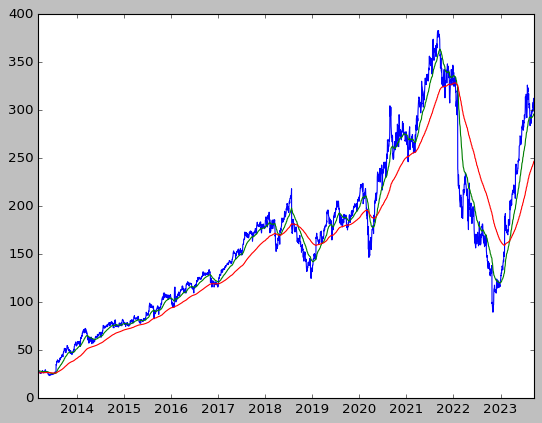

In [728]:
def graficoprezzo(db1):
    db1["ema1"]=ta.ema(db1["Close"],length=50)
    db1["ema2"]=ta.ema(db1["Close"],length=200)
    db1["ema3"]=ta.ema(db1["Close"],length=7)
    db1["ema4"]=ta.ema(db1["Close"],length=21)
    return db1
db1=graficoprezzo(db1)
db3=db1.copy()
db1.dropna(inplace=True)
plt.style.use("classic")
plt.plot(db1.index,db1["Close"])
plt.plot(db1.index,db1["ema1"])
plt.plot(db1.index,db1["ema2"])

In [729]:
def creatingdb2(db):
    db2=db[["Open","Close","Volume"]].copy()
    db2["roc"]=(db2["Close"]-db2["Open"])/db2["Open"]*100
    db2["month"]=db2.index
    db2["month"]=db2["month"].dt.month
    db2["day"]=db2.index
    db2["day"]=db2["day"].dt.day
    return db2
db2=creatingdb2(db)
print(db2.tail())


                  Open       Close    Volume       roc  month  day
Date                                                              
2023-09-14  306.739990  311.720001  19343100  1.623528      9   14
2023-09-15  311.609985  300.309998  28106400 -3.626324      9   15
2023-09-18  298.190002  302.549988  14234200  1.462150      9   18
2023-09-19  302.480011  305.070007  15924400  0.856254      9   19
2023-09-20  305.049988  299.670013  19352200 -1.763637      9   20


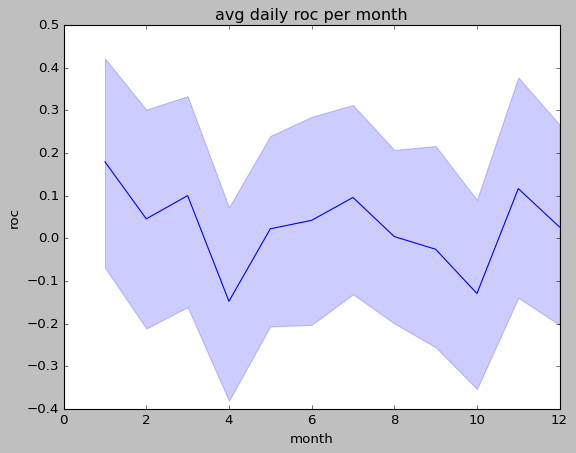

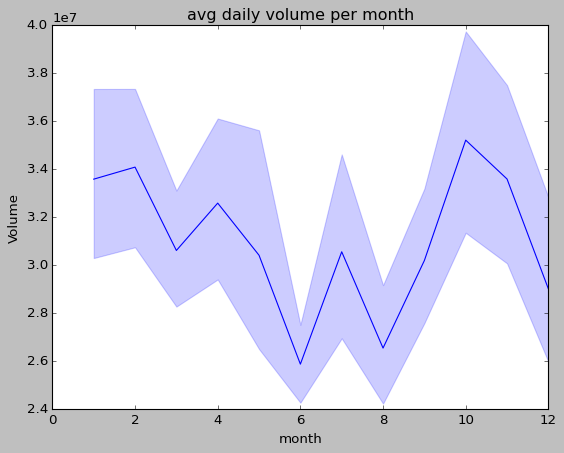

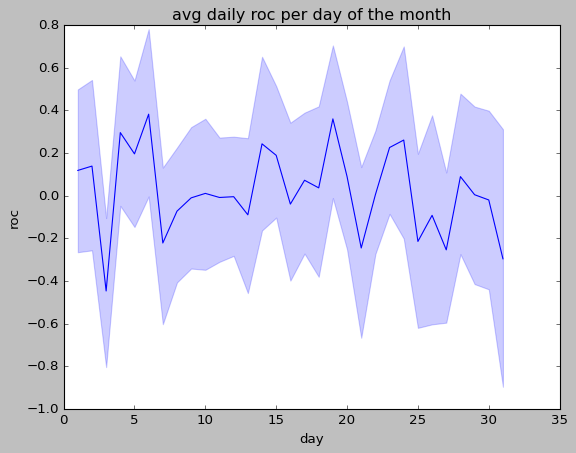

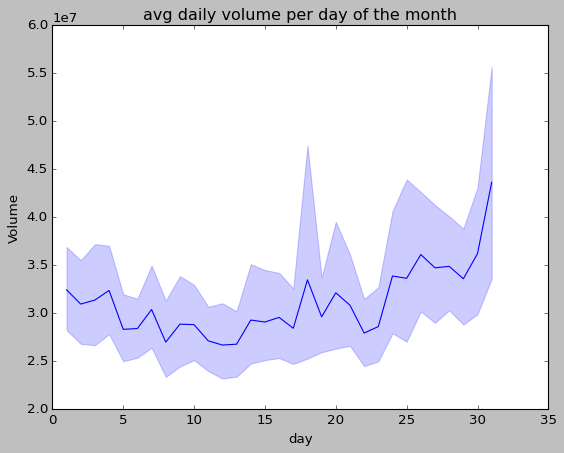

In [730]:
def rappresentazionegrafici(db2):
    sns.lineplot(data=db2,x="month",y="roc")
    plt.title("avg daily roc per month")
    plt.show()
    sns.lineplot(data=db2,x="month",y="Volume")
    plt.title("avg daily volume per month")
    plt.show()
    sns.lineplot(data=db2,x="day",y="roc")
    plt.title("avg daily roc per day of the month")
    plt.show()
    sns.lineplot(data=db2,x="day",y="Volume")
    plt.title("avg daily volume per day of the month")
    plt.show()
rappresentazionegrafici(db2)

<Axes: >

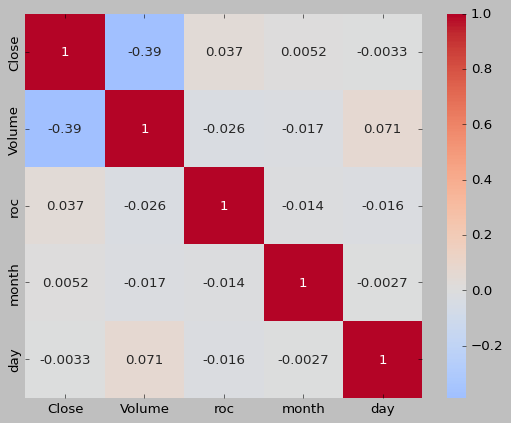

In [731]:
#mappa di correlazione

cor=db2.drop(columns=["Open"]).corr()
sns.heatmap(cor, annot=True,center=0,cmap="coolwarm")

In [732]:
print(db1.shape)
db1=db1.dropna()
print(db1.tail())

(2652, 27)
                 Close    Volume     Close 1     Close 2     Close 3  \
Date                                                                   
2023-09-12  301.660004  13480400  307.559998  297.890015  298.670013   
2023-09-13  305.059998  13210900  301.660004  307.559998  297.890015   
2023-09-14  311.720001  19343100  305.059998  301.660004  307.559998   
2023-09-15  300.309998  28106400  311.720001  305.059998  301.660004   
2023-09-18  302.549988  14234200  300.309998  311.720001  305.059998   

               Close 4     Close 5     Close 6     Close 7     Close 8  ...  \
Date                                                                    ...   
2023-09-12  299.170013  300.149994  296.380005  295.890015  295.100006  ...   
2023-09-13  298.670013  299.170013  300.149994  296.380005  295.890015  ...   
2023-09-14  297.890015  298.670013  299.170013  300.149994  296.380005  ...   
2023-09-15  307.559998  297.890015  298.670013  299.170013  300.149994  ...   
2023-09-18

In [733]:
#scaling data

from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
db1=db1.astype(float)
colonnenontarget=db1.drop(columns=["giornodapredirre"]).values.reshape(-1,db1.shape[1]-1)
colonnatarget=db1["giornodapredirre"].values.reshape(-1,1)
scalernontarget=MinMaxScaler()
scalertarget=MinMaxScaler()
print(db1)
colonnenontarget=scalernontarget.fit_transform(colonnenontarget)
colonnatarget=scalertarget.fit_transform(colonnatarget)

                 Close      Volume     Close 1     Close 2     Close 3  \
Date                                                                     
2013-03-07   28.580000  74540200.0   27.450001   27.520000   27.719999   
2013-03-08   27.959999  44198900.0   28.580000   27.450001   27.520000   
2013-03-11   28.139999  35642100.0   27.959999   28.580000   27.450001   
2013-03-12   27.830000  27569600.0   28.139999   27.959999   28.580000   
2013-03-13   27.080000  39619500.0   27.830000   28.139999   27.959999   
...                ...         ...         ...         ...         ...   
2023-09-12  301.660004  13480400.0  307.559998  297.890015  298.670013   
2023-09-13  305.059998  13210900.0  301.660004  307.559998  297.890015   
2023-09-14  311.720001  19343100.0  305.059998  301.660004  307.559998   
2023-09-15  300.309998  28106400.0  311.720001  305.059998  301.660004   
2023-09-18  302.549988  14234200.0  300.309998  311.720001  305.059998   

               Close 4     Close 5   

In [734]:
# divisione in train,test

x=colonnenontarget
y=colonnatarget
split=int(0.8*len(x))
xtrain,xtest=x[:split],x[split:]
ytrain,ytest=y[:split],y[split:]
linearmodel=LinearRegression()
modelgbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=0)
modelsvr=SVR(kernel="linear")


0.9831975740022089
0.019400196803725064


Text(0.5, 1.0, 'prediction with linear model')

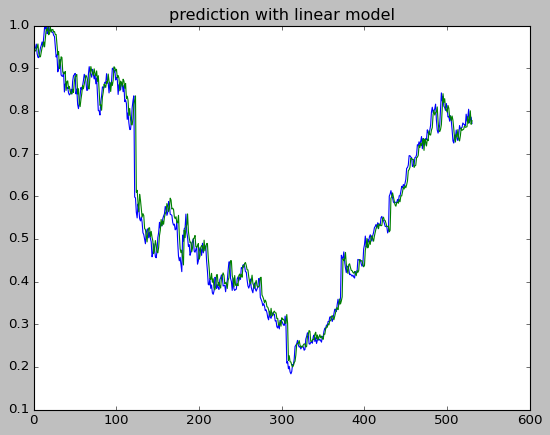

In [735]:
# Linear regression model
linearmodel.fit(xtrain,ytrain)
linearpredictions=linearmodel.predict(xtest)
print(r2_score(ytest,linearpredictions))
print(mean_absolute_error(ytest,linearpredictions))
plt.plot(ytest)
plt.plot(linearpredictions)
plt.title("prediction with linear model")

0.05080093656745492


Text(0.5, 1.0, 'prediction with gbr model')

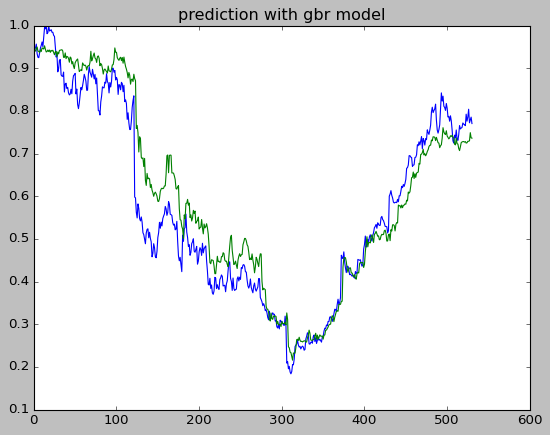

In [736]:
#GBR model

# grid = {
#     'n_estimators': [50, 100, 200],  # Numero di alberi nell'ensemble
#     'learning_rate': [0.01, 0.1, 0.2],  # Tasso di apprendimento
#     'max_depth': [3, 4, 5]  # Massima profondità degli alberi
    
# }

# search=GridSearchCV(estimator=modelgbr,param_grid=grid,cv=5)
# search.fit(xtrain,ytrain)
# bestmodel=search.best_estimator_
# bestmodel.fit(xtrain,ytrain)
modelgbr.fit(xtrain,ytrain)
predictionsgbr=modelgbr.predict(xtest)
print(mean_absolute_error(ytest,predictionsgbr))
plt.plot(ytest)
plt.plot(predictionsgbr)
plt.title("prediction with gbr model")

In [737]:
# model SVR

# gridsvr = {
#     'kernel': ['linear', 'rbf', 'poly'],  # Funzione kernel
#     'C': [0.1, 1, 10],  # Parametro di regolarizzazione
#     'epsilon': [0.01, 0.1, 0.2],  # Tolleranza
#     'gamma': ['scale', 'auto']  # Coefficiente gamma (solo per kernel 'rbf' e 'poly')
# }
# searchsvr=GridSearchCV(estimator=modelsvr, param_grid=gridsvr, cv=5)
# searchsvr.fit(xtrain,ytrain)
# bestmodelsvr=searchsvr.best_estimator_
# predictionssvr=bestmodelsvr.predict(xtest)
# print(r2_score(ytest,predictionssvr))
# print(mean_absolute_error(ytest,predictionssvr))
# plt.plot(ytest)
# plt.plot(predictionssvr)
# plt.title("prediction with SVR model")

In [738]:
# rete neurale con lstm

import torch
import torch.nn as nn

xtraint=torch.from_numpy(xtrain.astype(np.float32)).view(xtrain.shape[0],xtrain.shape[1])
ytraint=torch.from_numpy(ytrain.astype(np.float32)).view(ytrain.shape[0], 1)
xtestt=torch.from_numpy(xtest.astype(np.float32)).view(xtest.shape[0], xtrain.shape[1])


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet,self).__init__()
        self.l1=nn.LSTM(input_size, hidden_size, batch_first=False)
        self.l3=nn.Linear( hidden_size, hidden_size)
        self.l2=nn.Linear(hidden_size, 1)
        
    def forward(self,x):
        out,_= self.l1(x)                                                 
        # out= self.l3(out)
        # out=out[:,-1]
        
        out=self.l2(out)
        return out
    
model3=NeuralNet(xtrain.shape[1],1)
criterion=nn.L1Loss()
optimizer=torch.optim.Adam(model3.parameters(),lr=0.01)


for epoch in range(1000):
    pred=model3(xtraint)
    loss=criterion(pred,ytraint)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1)%1000==0:
        print(f"epoch :{epoch+1}, loss={loss.item()}")



predictionslstm=model3(xtestt)
predictionslstm=predictionslstm.detach().numpy()


epoch :1000, loss=0.008679716847836971


Text(0.5, 1.0, 'lstm model')

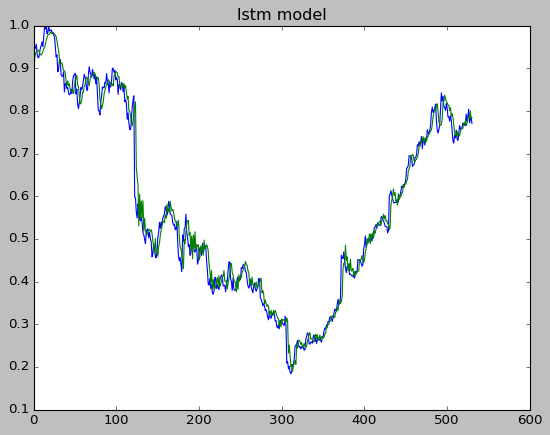

In [739]:

plt.plot(ytest)
plt.plot(predictionslstm)
plt.title("lstm model")

In [740]:
# applico il modello al db con ancora i dati dell'ultimo giorno 
# di mercato perchè nel db1 era stata droppata per il shift per creare la colonna del prezzo del giorno successivo.

db3x=db3.drop(columns=["giornodapredirre"])
db3x.dropna(inplace=True)
xnuova=db3x.values.reshape(-1,db3.shape[1]-1)
xnuova=xnuova[split:]
# print(xnuova)
xnuova=scalernontarget.transform(xnuova)
predictionsnuove=linearmodel.predict(xnuova)

In [741]:
# previsione con modello lineare

oggi=xnuova[-1].reshape(-1,db3.shape[1]-1)
previsionerichiesta=linearmodel.predict(oggi)
ultimachiusura=(db3["Close"].tail(1).reset_index())["Close"]
previsionerichiesta=previsionerichiesta.reshape(1,1)
previsionerichiesta=scalertarget.inverse_transform(previsionerichiesta).reshape(-1)
print(f"The price at the selected day is {round(float(previsionerichiesta),3)}")
print(f"At the last day the price is {round(float(ultimachiusura),3)}")
print(f"According to the Linear model at the date {today + datetime.timedelta(days=giornodapredirre)} will change of {round((float(previsionerichiesta)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compared to today price")

The price at the selected day is 299.687
At the last day the price is 299.67
According to the Linear model at the date 2023-09-23 will change of 0.006% compared to today price


In [742]:
# Previsioni con modello GBR

oggi=xnuova[-1].reshape(-1,db3.shape[1]-1)
previsionerichiestagbr=modelgbr.predict(oggi)
# ultimachiusura=(db3["Close"].tail(1).reset_index())["Close"]
previsionerichiestagbr=previsionerichiestagbr.reshape(1,1)
previsionerichiestagbr=scalertarget.inverse_transform(previsionerichiestagbr).reshape(-1)
print(f"The price at the selected day is {round(float(previsionerichiestagbr),3)}")
print(f"At the last day the price is {round(float(ultimachiusura),3)}")
print(f"According to the GBR model at the date {today + datetime.timedelta(days=giornodapredirre)} will change of {round((float(previsionerichiestagbr)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compared to today price")

The price at the selected day is 289.792
At the last day the price is 299.67
According to the GBR model at the date 2023-09-23 will change of -3.296% compared to today price


In [743]:
# previsione con modello SVR


# previsionesvrnuova=bestmodelsvr.predict(oggi)
# ultimachiusura=(db3["Close"].tail(1).reset_index())["Close"]
# previsionesvrnuova=previsionesvrnuova.reshape(1,1)
# previsionesvrnuova=scalertarget.inverse_transform(previsionesvrnuova).reshape(-1)
# print(f"il prezzo al giorno richiesto è {round(float(previsionesvrnuova),3)}")
# print(f"l'ultima chiusura è {round(float(ultimachiusura),3)}")
# print(f"secondo il modello SVR rispetto all'ultima chiusura il prezzo alla data {today + datetime.timedelta(days=giornodapredirre)} varierà di {round((float(previsionesvrnuova)-float(ultimachiusura))/float(ultimachiusura)*100,3)} %")

In [744]:
# previsione con modello lstm

oggit=torch.from_numpy(oggi.astype(np.float32)).view(oggi.shape[0],oggi.shape[1])
predlstmnuove=model3(oggit).detach().numpy()
predlstmnuove=scalertarget.inverse_transform(predlstmnuove)
print(f"The price at the selected day is {round(float(predlstmnuove),3)}")
print(f"At the last day the price is {round(float(ultimachiusura),3)}")
print(f"According to the LSTM model at the date {today + datetime.timedelta(days=giornodapredirre)} will change of {round((float(predlstmnuove)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compared to today price")


The price at the selected day is 307.987
At the last day the price is 299.67
According to the LSTM model at the date 2023-09-23 will change of 2.776% compared to today price


In [745]:
# valutazione modello se sale o scende
# L'ultimo giorno del xtest è il giorno attuale meno i giorni che si predicono.
# non serve però avere il giorno attuale perchè si va solo a verificare la precisione del modello nel tempo

xtest1=(scalernontarget.inverse_transform(xtest))[:,0]
ytest1=(scalertarget.inverse_transform(ytest)).flatten()

dbveritiero=pd.DataFrame({"xtest":xtest1,"ytest":ytest1})
dbveritiero.insert(1,"sale",[1 if x>y else 0 for x,y in zip(dbveritiero["ytest"],dbveritiero["xtest"])])
# print(dbveritiero)

In [746]:
# quante volte il modello indovina se il prezzo sale o scende con modello lineare

from sklearn.metrics import confusion_matrix, precision_score
predictionsinverse=(scalertarget.inverse_transform(linearpredictions)).flatten()
dbprevisioni=pd.DataFrame({"xtest":xtest1,"previsioni":predictionsinverse})
dbprevisioni.insert(1,"sale",[1 if x>y else 0 for x,y in zip(dbprevisioni["previsioni"],dbveritiero["xtest"])])
# print(dbprevisioni)
cf=confusion_matrix(dbveritiero["sale"],dbprevisioni["sale"])
print(cf)
precisionemodellolineare=round((cf[0,0]+cf[1,1])/np.sum(cf)*100,2)
print(f"The linear regression model has a precision of {round(precisionemodellolineare,2)}% in the predicting if the price will go up or down.")
dbmediarocnelperiodo=db3[["Close","giornodapredirre"]]
dbmediarocnelperiodo.dropna(inplace=True)
dbmediarocnelperiodo["rocnelperiodo"]=(dbmediarocnelperiodo["giornodapredirre"]-dbmediarocnelperiodo["Close"])/dbmediarocnelperiodo["Close"]*100
dbrocsale=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]>0]
dbrocscende=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]<0]
precisionequandosalelineare=round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)
precisionequandoscendelineare=round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)
print(f"When the model predict the price will go up it is right the {precisionequandosalelineare}% of the times")
print(f"When the model predict the price will go down it is right the {precisionequandoscendelineare}% of the times")
print(f"The close price at the selected day is {round(float(previsionerichiesta),3)}")
print(f"At the last closing day the price is {round(float(ultimachiusura),3)}")
print(f"According to the Linear model at the date {today + datetime.timedelta(days=giornodapredirre)} the price will change of {round((float(previsionerichiesta)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compared to today's price")






[[ 66 197]
 [ 76 192]]
The linear regression model has a precision of 48.59% in the predicting if the price will go up or down.
When the model predict the price will go up it is right the 49.36% of the times
When the model predict the price will go down it is right the 46.48% of the times
The close price at the selected day is 299.687
At the last closing day the price is 299.67
According to the Linear model at the date 2023-09-23 the price will change of 0.006% compared to today's price


In [747]:
# Di quanto sale o scende in media il modello nel periodo di tempo?

# dbmediarocnelperiodo=db3[["Close","giornodapredirre"]]
# dbmediarocnelperiodo.dropna(inplace=True)
# dbmediarocnelperiodo["rocnelperiodo"]=(dbmediarocnelperiodo["giornodapredirre"]-dbmediarocnelperiodo["Close"])/dbmediarocnelperiodo["Close"]*100
# dbrocsale=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]>0]
# dbrocscende=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]<0]
# print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è salito {dbrocsale.shape[0]} volte cioè il {round(dbrocsale.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
# print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è sceso {dbrocscende.shape[0]} volte cioè il {round(dbrocscende.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
# print(f"Quando il prezzo sale in media nel periodo considerato sale in media del {round(dbrocsale['rocnelperiodo'].mean(),2)}%")
# print(f"Quando il prezzo scende in media nel periodo considerato scende in media del {round(dbrocscende['rocnelperiodo'].mean(),2)}%")


In [748]:
# print(cf)
# print(f"Quando il modello prevede che il prezzo sale ha una probbilità del {round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)}% di avere ragione")
# print(f"Quando il modello prevede che il prezzo scende ha una probbilità del {round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)}% di avere ragione")

In [749]:
# MODEL GBR

from sklearn.metrics import confusion_matrix, precision_score
predictionsinverse=(scalertarget.inverse_transform(predictionsgbr.reshape(-1,1))).flatten()
dbprevisioni=pd.DataFrame({"xtest":xtest1,"previsioni":predictionsinverse})
dbprevisioni.insert(1,"sale",[1 if x>y else 0 for x,y in zip(dbprevisioni["previsioni"],dbveritiero["xtest"])])
# print(dbprevisioni)
cf=confusion_matrix(dbveritiero["sale"],dbprevisioni["sale"])
print(cf)
precisionemodellogbr=round((cf[0,0]+cf[1,1])/np.sum(cf),2)*100
print(f"The GBR model has a precision of {precisionemodellogbr}% in predicting if the price will go up or down in the selected period of time.")
dbmediarocnelperiodo=db3[["Close","giornodapredirre"]]
dbmediarocnelperiodo.dropna(inplace=True)
dbmediarocnelperiodo["rocnelperiodo"]=(dbmediarocnelperiodo["giornodapredirre"]-dbmediarocnelperiodo["Close"])/dbmediarocnelperiodo["Close"]*100
dbrocsale=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]>0]
dbrocscende=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]<0]
precisionequandosaleGBR=round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)
precisionequandoscendeGBR=round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)
print(f"When the model predict the price will go up it is right the {precisionequandosaleGBR}% of the times")
print(f"When the model predict the price will go down it is right the {precisionequandoscendeGBR}% of the times")
print(f"The close price at the selected day is {round(float(previsionerichiestagbr),3)}")
print(f"At the last closing day the price is {round(float(ultimachiusura),3)}")
print(f"According to the GBR model at the date {today + datetime.timedelta(days=giornodapredirre)} the price will change of {round((float(previsionerichiestagbr)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compared to today's price")

[[ 88 175]
 [101 167]]
The GBR model has a precision of 48.0% in predicting if the price will go up or down in the selected period of time.
When the model predict the price will go up it is right the 48.83% of the times
When the model predict the price will go down it is right the 46.56% of the times
The close price at the selected day is 289.792
At the last closing day the price is 299.67
According to the GBR model at the date 2023-09-23 the price will change of -3.296% compared to today's price


In [750]:
# Model LSTM

from sklearn.metrics import confusion_matrix, precision_score
predictionsinverse=(scalertarget.inverse_transform(predictionslstm.reshape(-1,1))).flatten()
dbprevisioni=pd.DataFrame({"xtest":xtest1,"previsioni":predictionsinverse})
dbprevisioni.insert(1,"sale",[1 if x>y else 0 for x,y in zip(dbprevisioni["previsioni"],dbveritiero["xtest"])])
# print(dbprevisioni)
cf=confusion_matrix(dbveritiero["sale"],dbprevisioni["sale"])
print(cf)
precisionemodellolstm=round((cf[0,0]+cf[1,1])/np.sum(cf),2)*100
print(f"The LSTM model has a precision of {precisionemodellolstm}% in predicting if the price will go up or down.")
dbmediarocnelperiodo=db3[["Close","giornodapredirre"]]
dbmediarocnelperiodo.dropna(inplace=True)
dbmediarocnelperiodo["rocnelperiodo"]=(dbmediarocnelperiodo["giornodapredirre"]-dbmediarocnelperiodo["Close"])/dbmediarocnelperiodo["Close"]*100
dbrocsale=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]>0]
dbrocscende=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]<0]
precisionequandosaleLSTM=round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)
precisionequandoscendeLSTM=round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)
print(f"When the model predict the price will go up it is right the {precisionequandosaleLSTM}% of the times")
print(f"When the model predict the price will go down it is right the {precisionequandoscendeLSTM}% of the times")
print(f"The close price at the selected day is {round(float(predlstmnuove),3)}")
print(f"At the last closing day the price is {round(float(ultimachiusura),3)}")
print(f"According to the LSTM model at the date {today + datetime.timedelta(days=giornodapredirre)} the price will change of {round((float(predlstmnuove)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compred to today's price.")

[[ 85 178]
 [ 77 191]]
The LSTM model has a precision of 52.0% in predicting if the price will go up or down.
When the model predict the price will go up it is right the 51.76% of the times
When the model predict the price will go down it is right the 52.47% of the times
The close price at the selected day is 307.987
At the last closing day the price is 299.67
According to the LSTM model at the date 2023-09-23 the price will change of 2.776% compred to today's price.


In [751]:
print(f"The selected period to predict is {giornodapredirre} days")

# quale è il modello con più precisione in assoluto

modellopiùpreciso=max(precisionemodellolineare,precisionemodellolstm,precisionemodellogbr)
if modellopiùpreciso==precisionemodellolineare:
    print(f"The most precise is the linear model: {precisionemodellolineare}")
elif modellopiùpreciso==precisionemodellolstm:
    print(f"The most precise is the LSTM model: {precisionemodellolstm}")
elif modellopiùpreciso==precisionemodellogbr:
    print(f"The most precise is the GBR model: {precisionemodellogbr}")
modellomenopreciso=min(precisionemodellolineare,precisionemodellolstm,precisionemodellogbr)
if modellomenopreciso==precisionemodellolineare:
    print(f"The less precise is the linear model: {precisionemodellolineare}")
elif modellomenopreciso==precisionemodellolstm:
    print(f"The less precise is the LSTM model: {precisionemodellolstm}")
elif modellomenopreciso==precisionemodellogbr:
    print(f"The less precise is the GBR model: {precisionemodellogbr}")


# quale è il modello che prevede meglio quando il prezzo sale

modellopiùprecisoquandosale=max(precisionequandosaleLSTM,precisionequandosaleGBR,precisionequandosalelineare)
if modellopiùprecisoquandosale==precisionequandosalelineare:
    print(f"When it predicts the price will go up the most precise model is the linear model: {precisionequandosalelineare}")
elif modellopiùprecisoquandosale==precisionequandosaleLSTM:
    print(f"When it predicts the price will go up the most precise model is the LSTM model: {precisionequandosaleLSTM}")
elif modellopiùprecisoquandosale==precisionequandosaleGBR:
    print(f"When it predicts the price will go up the most precise model is the GBR model: {precisionequandosaleGBR}")

# quale è il modello che prevede meglio quando il prezzo scende

modellopiùprecisoquandoscende=max(precisionequandoscendeLSTM,precisionequandoscendeGBR,precisionequandoscendelineare)
if modellopiùprecisoquandoscende==precisionequandoscendelineare:
    print(f"When it predicts the price will go down the most precise model is the linear model: {precisionequandoscendelineare}")
elif modellopiùprecisoquandoscende==precisionequandoscendeLSTM:
    print(f"When it predicts the price will go down the most precise model is the LSTM model: {precisionequandoscendeLSTM}")
elif modellopiùprecisoquandoscende==precisionequandoscendeGBR:
    print(f"When it predicts the price will go down the most precise model is the GBR model: {precisionequandoscendeGBR}")




The selected period to predict is 2 days
The most precise is the LSTM model: 52.0
The less precise is the GBR model: 48.0
When it predicts the price will go up the most precise model is the LSTM model: 51.76
When it predicts the price will go down the most precise model is the LSTM model: 52.47


In [752]:
# quale è il modello che prevede peggio quando il prezzo sale

modellomenoprecisoquandosale=min(precisionequandosaleLSTM,precisionequandosaleGBR,precisionequandosalelineare)
if modellomenoprecisoquandosale==precisionequandosalelineare:
    print(f"When it predicts the price will go up the less precise model is the linear model: {precisionequandosalelineare}")
elif modellomenoprecisoquandosale==precisionequandosaleLSTM:
    print(f"When it predicts the price will go up the less precise model is the LSTM model: {precisionequandosaleLSTM}")
elif modellomenoprecisoquandosale==precisionequandosaleGBR:
    print(f"When it predicts the price will go up the less precise model is the GBR model: {precisionequandosaleGBR}")

# quale è il modello che prevede peggio quando il prezzo scende

modellomenoprecisoquandoscende=min(precisionequandoscendeLSTM,precisionequandoscendeGBR,precisionequandoscendelineare)
if modellomenoprecisoquandoscende==precisionequandoscendelineare:
    print(f"When it predicts the price will go down the less precise model is the linear model: {precisionequandoscendelineare}")
elif modellomenoprecisoquandoscende==precisionequandoscendeLSTM:
    print(f"When it predicts the price will go down the less precise model is the LSTM model: {precisionequandoscendeLSTM}")
elif modellomenoprecisoquandoscende==precisionequandoscendeGBR:
    print(f"When it predicts the price will go down the less precise model is the GBR model: {precisionequandoscendeGBR}")

print(f"{tag} price in the selected period of time effectively went up {dbrocsale.shape[0]} times that is the {round(dbrocsale.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% of the times.")
print(f"{tag} price in the selected period of time effectively went down {dbrocscende.shape[0]} times that is the {round(dbrocscende.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% of the times.")
print(f"When the price goes up in the selected period of time on average it goes up of {round(dbrocsale['rocnelperiodo'].mean(),2)}%")
print(f"When the price goes down in the selected period of time on average it goes up of {round(dbrocscende['rocnelperiodo'].mean(),2)}%")

When it predicts the price will go up the less precise model is the GBR model: 48.83
When it predicts the price will go down the less precise model is the linear model: 46.48
META price in the selected period of time effectively went up 1522 times that is the 53.42% of the times.
META price in the selected period of time effectively went down 1327 times that is the 46.58% of the times.
When the price goes up in the selected period of time on average it goes up of 2.42%
When the price goes down in the selected period of time on average it goes up of -2.32%
